In [22]:
import numpy as np

class Perceptron:
    """
    Basic perceptron model using the unit step function as the activation
    function for the weighted output
    """
    def __init__(self, alpha = 0.01, iterations = 10000):
        self.alpha = alpha
        self.iterations = iterations
        self.activation_function = self._unit_step_function
        self.weights = None
        self.bias = None

    def fit(self, X, y):

        number_of_samples, number_of_features = X.shape

        self.weights = np.random.randn(number_of_features)
        self.bias = np.random.randn()

        y_asserted = np.array([1 if i > 0 else 0 for i in y])

        for _ in range(self.iterations):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_function(linear_output)

                self.weights += (self.alpha * (y_asserted[idx] - y_predicted) * x_i)
                self.bias += (self.alpha * (y_asserted[idx] - y_predicted))

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_function(linear_output)
        return y_predicted
    
    def _unit_step_function(self, x):
        return np.where(x >= 0, 1, 0)

In [23]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 500, n_features = 2, centers = 2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = Perceptron()
model.fit(X_train, y_train)
results = model.predict(X_test)

print("Accuracy : {}".format(np.sum(y_test == results) / len(y_test)))

Accuracy : 0.97


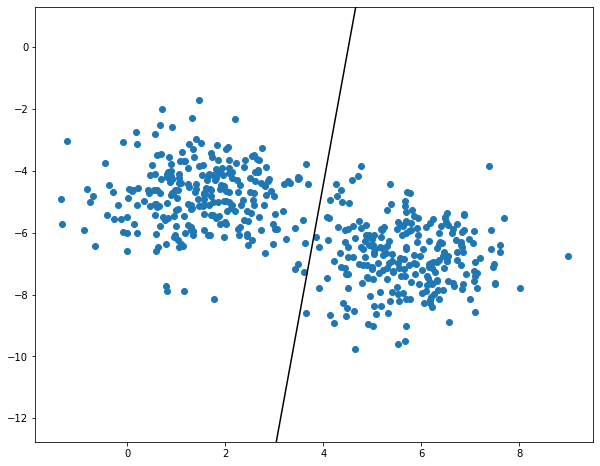

In [24]:
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(1,1,1)
plt.scatter(X[:, 0], X[:, 1])

x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])

x1_1 = (-model.weights[0] * x0_1 - model.bias) / model.weights[1]
x1_2 = (-model.weights[0] * x0_2 - model.bias) / model.weights[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], "k")

ymin = np.amin(X_train[:, 1])
ymax = np.amax(X_train[:, 1])

ax.set_ylim([ymin - 3, ymax + 3])
plt.show()